In [1]:
import numpy as np
from pathlib import Path
from pysz.pysz import SZ
import sys

from LoadArrays import plot_img 

# prepare your data in numpy array format
HOME="/home/jts75596/yuan_projects/feature_maps"

# init SZ (both SZ2 and SZ3 are supported)
# Please change the path to the SZ dynamic library file in your system
lib_extention = {
    "darwin": "libSZ3c.dylib",
    "windows": "SZ3c.dll",
}.get(sys.platform, "libSZ3c.so")

sz = SZ("{}/ExternalDependencies/SZ3/install/lib64/{}".format(HOME,lib_extention))

In [2]:
fmaps = "{}/data_zip/resnet50/cfg0_input_data/n01910747/n01910747_132_feature_maps.npy".format(HOME)
data = np.load(fmaps)

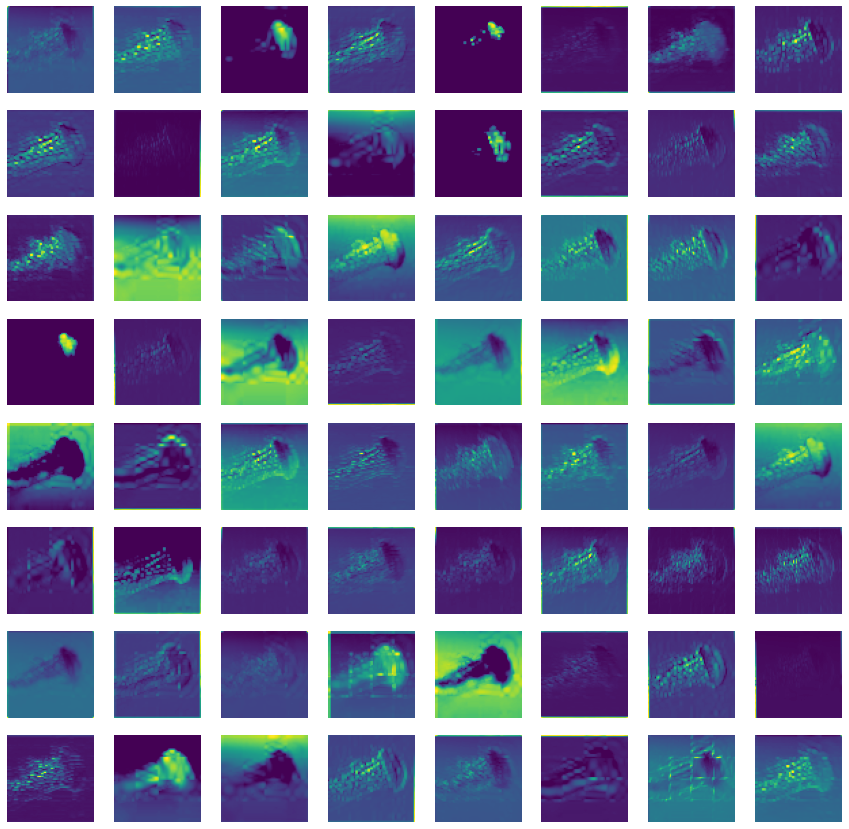

In [3]:
plot_img(data)

In [4]:
data_cmpr, cmpr_ratio = sz.compress(data, 1, 0, 0.01, 0) # relative error is specified via the 3rd parameter (currently 1% error)
print("compression ratio = {:5G}".format(cmpr_ratio))

# decompress, both input and output data are numpy array
data_dec = sz.decompress(data_cmpr, data.shape, data.dtype)

# verify
sz.verify(data, data_dec)
# The output of sz.verify() will be compression ratio, max_diff
# max_diff, psnr, nrmse

compression ratio = 22.8837
abs err=0.39169979


(0.3916998, 45.04283666610718, 0.0055957474)

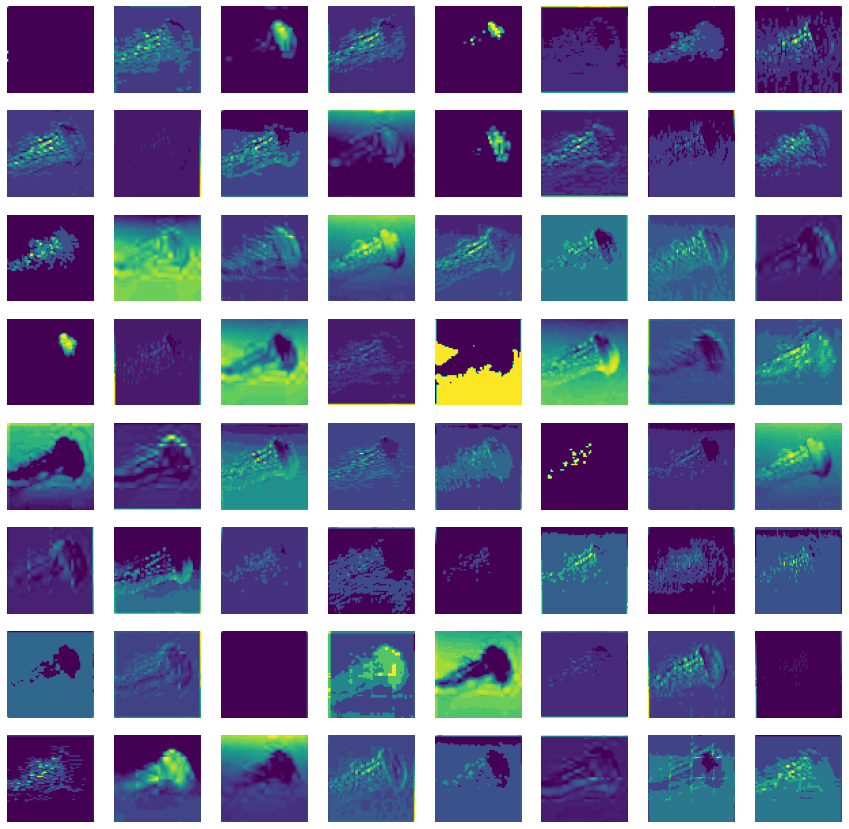

In [22]:
plot_img(data_dec)

## ZFP

In [24]:
import zfpy
import numpy as np

# tolerance indicates absolute error, we can also use rate=4, 8, 16 or 32.
compressed_data = zfpy.compress_numpy(data, tolerance=1e-3)
decompressed_array = zfpy.decompress_numpy(compressed_data)


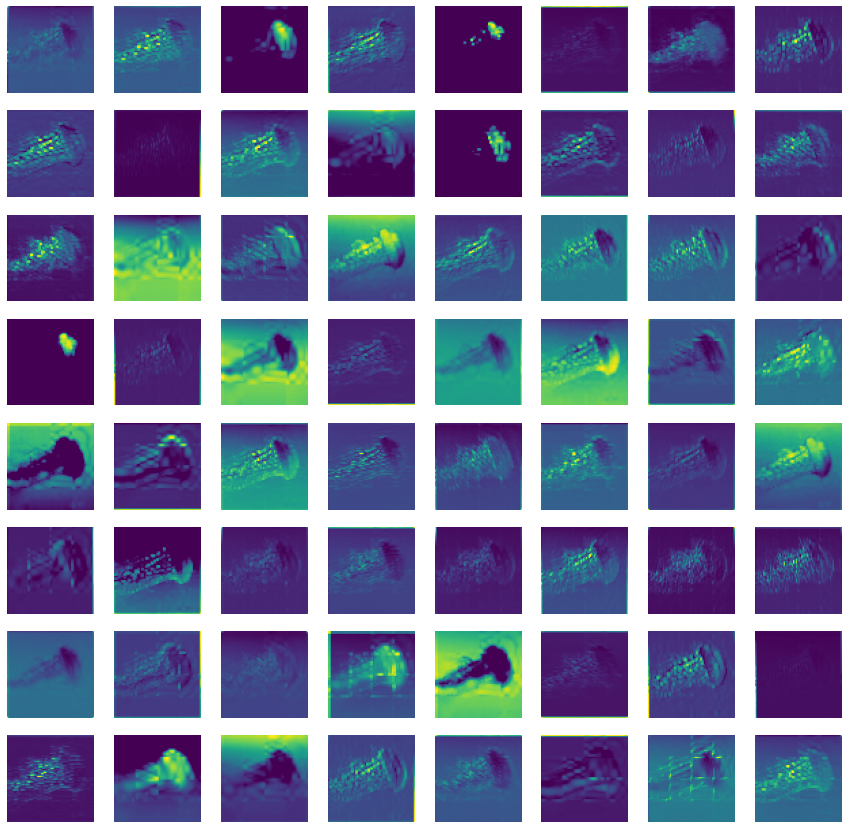

In [25]:
plot_img(decompressed_array)